## Image classification using fastai(v2)

This implementation uses a set of images downloaded from Google, which contains six categories of Malaysian rice cuisine, having around 90-100 images for each class.

<br>

The script is referenced from the fast.ai deep learning course "Practical Deep Learning for Coders": https://course.fast.ai/, particularly Lesson 3 "Production and Deployment" with the bear classifier: https://course.fast.ai/videos/?lesson=3. 

The model is trained using the fastai2 library, implemented on Paperspace Gradient, using the Paperspace + Fast.AI notebook container with instance type P6000 GPU.

<br>

The model is fine-tuned using resnet18 architecture with 10 iterations. The error rate is 0.16. The trained model is exported as 'export.pkl'.

## Import libraries and set dataset path

In [1]:
#from utils import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
pwd

'/notebooks/course-v4/nbs'

In [3]:
path = Path('downloads')
path

Path('downloads')

## Check images

In [4]:
# get image dataset

fns = get_image_files(path)
fns

(#1125) [Path('downloads/banana leaf rice/1.img-2737-600x800.jpg'),Path('downloads/banana leaf rice/10.01fb10f884f674db41a5ff01966c0347.jpg'),Path('downloads/banana leaf rice/11.g5kd7ax.jpg'),Path('downloads/banana leaf rice/12.malaysia.food_.img_1017.jpg'),Path('downloads/banana leaf rice/14.15baeed0ebaca356cb2de2f12681e4f7.jpg'),Path('downloads/banana leaf rice/15.maxresdefault.jpg'),Path('downloads/banana leaf rice/17.800.brunei.img_5305.jpg'),Path('downloads/banana leaf rice/18.malaysiafood-1-1.jpg'),Path('downloads/banana leaf rice/19.banana-leaf-rice.jpg'),Path('downloads/banana leaf rice/2.500px-bananaleafrice001.jpg')...]

In [5]:
# check images

failed = verify_images(fns)
failed

(#0) []

In [6]:
# if there are invalid images, remove from directory

failed.map(Path.unlink);

## Create a data loader with train/test split and data augmentation

In [7]:
# configure a DataBlock container
# blocks takes images and labels
# RandomSplitter splits dataset into 80% train and 20% valid sets
# item_tfms resizes images to 128x128

nasis = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

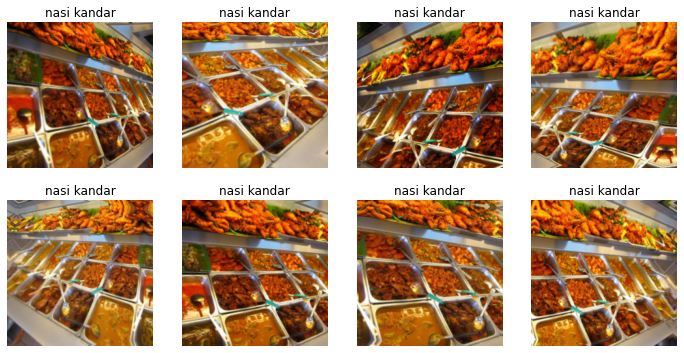

In [8]:
# initiate a new data block container
# tranform images using RandomResizedCrop
# transform image batches using aug_transforms
# create data loader with data path
# visualize train images with image augmentation

nasis = nasis.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = nasis.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Train model using transfer learning

In [9]:
# create a cnn learner with resnet18 architecture
# use the data loader as input
# set error_rate as the metric
# train for 10 epochs

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: U

## Validation: Confusion matrix and display images of the top 5 losses

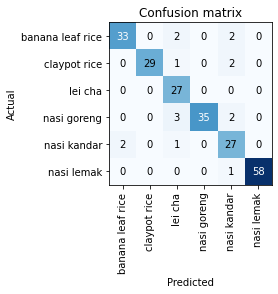

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

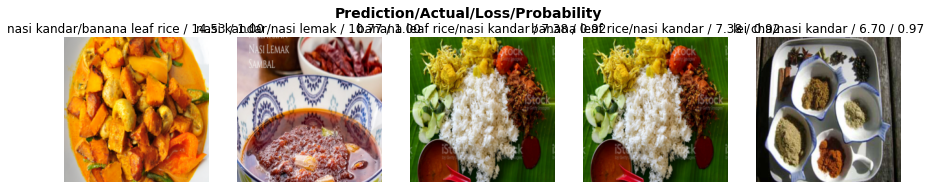

In [11]:
interp.plot_top_losses(5, nrows=1)

## Manually change train & test images, either delete or move to different folders

In [12]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Export learned model

In [14]:
learn.export()

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

## Predict test images using the trained model

In [16]:
learn_inf = load_learner(path/'export.pkl')

In [17]:
learn_inf.predict('IMG_0844.jpg')

('nasi lemak',
 tensor(5),
 tensor([1.9714e-04, 5.0440e-04, 6.9259e-04, 2.7804e-04, 1.1254e-03, 9.9720e-01]))

In [18]:
learn_inf.dls.vocab

(#6) ['banana leaf rice','claypot rice','lei cha','nasi goreng','nasi kandar','nasi lemak']

## Install the Voila library to make Jupyter Notebook as a webapp 

In [19]:
# !pip install voila
# !jupyter serverextension enable voila —sys-prefix